In [1]:
# Install (if needed)
!pip install seaborn --quiet

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score


In [2]:
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
# Initialize and train KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn_clf.predict(X_test_scaled)

# Confusion matrix and report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


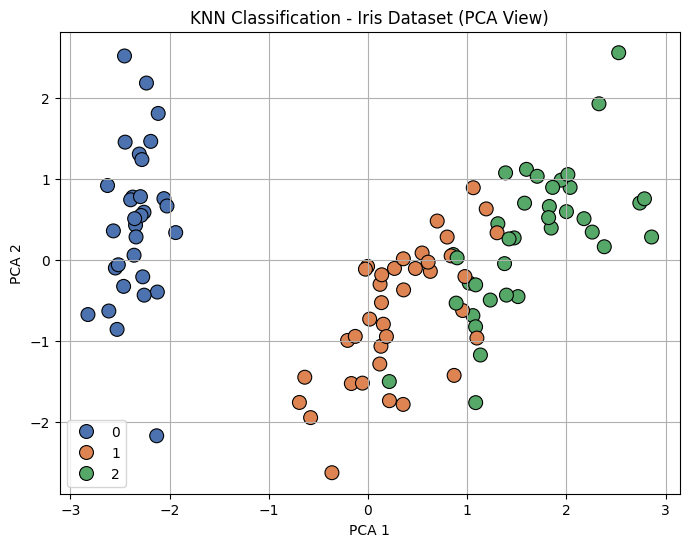

In [4]:
from sklearn.decomposition import PCA

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=y_train, palette="deep", s=100, edgecolor='k')
plt.title("KNN Classification - Iris Dataset (PCA View)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


In [6]:
from sklearn.datasets import fetch_california_housing

# Load data
housing = fetch_california_housing()
X_h = housing.data
y_h = housing.target
feature_names_h = housing.feature_names

# Train-test split
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h, test_size=0.3, random_state=42)

# Standardize features
scaler_h = StandardScaler()
X_train_h_scaled = scaler_h.fit_transform(X_train_h)
X_test_h_scaled = scaler_h.transform(X_test_h)


In [7]:
# Train regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_h_scaled, y_train_h)

# Predict and evaluate
y_pred_h = knn_reg.predict(X_test_h_scaled)
print("MSE:", mean_squared_error(y_test_h, y_pred_h))
print("R^2 Score:", r2_score(y_test_h, y_pred_h))


MSE: 0.42949402014873317
R^2 Score: 0.6727764602454027


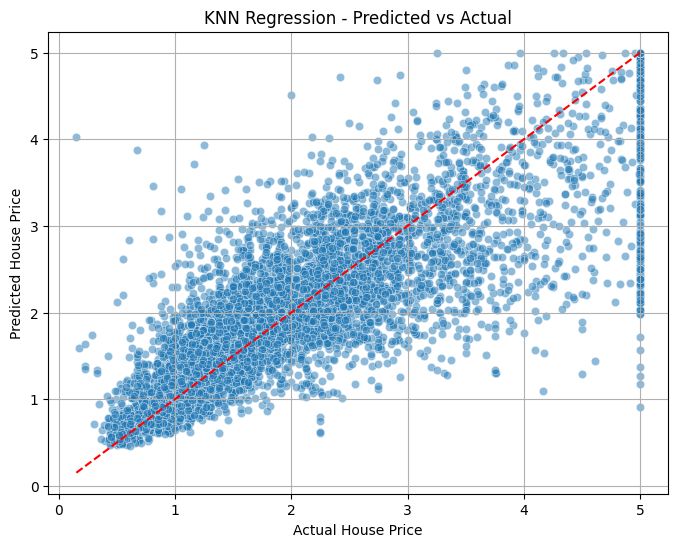

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_h, y=y_pred_h, alpha=0.5)
plt.plot([min(y_test_h), max(y_test_h)], [min(y_test_h), max(y_test_h)], color='red', linestyle='--')
plt.title("KNN Regression - Predicted vs Actual")
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.grid(True)
plt.show()
